In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
file_path = r'C:\Users\ishan\Downloads\laptop_price.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [52]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
RAM (in GB)         0
Memory              0
Gpu                 0
OpSys               0
Weight (in kg)      0
Price_euros         0
dtype: int64

In [54]:
df.shape

(1025, 13)

In [59]:
df['Ram'] = df['Ram'].astype(str)
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

df['Weight'] = df['Weight'].astype(str)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df.info()

KeyError: 'Ram'

In [10]:
df=df.rename(columns={'Ram': 'RAM (in GB)', 'Weight': 'Weight (in kg)'})
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   RAM (in GB)       1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight (in kg)    1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 127.4+ KB


In [11]:
df.describe()

,laptop_ID,Inches,RAM (in GB),Weight (in kg),Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,2.038734,1123.686992
std,381.172104,1.426304,5.084665,0.665475,699.009043
min,1.000000,10.100000,2.000000,0.690000,174.000000
25%,331.500000,14.000000,4.000000,1.500000,599.000000
50%,659.000000,15.600000,8.000000,2.040000,977.000000
75%,990.500000,15.600000,8.000000,2.300000,1487.880000
max,1320.000000,18.400000,64.000000,4.700000,6099.000000


In [138]:
#label_encoders = {}
#for column in ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']:
    #le = LabelEncoder()
    #df[column] = le.fit_transform(df[column])
    #label_encoders[column] = le

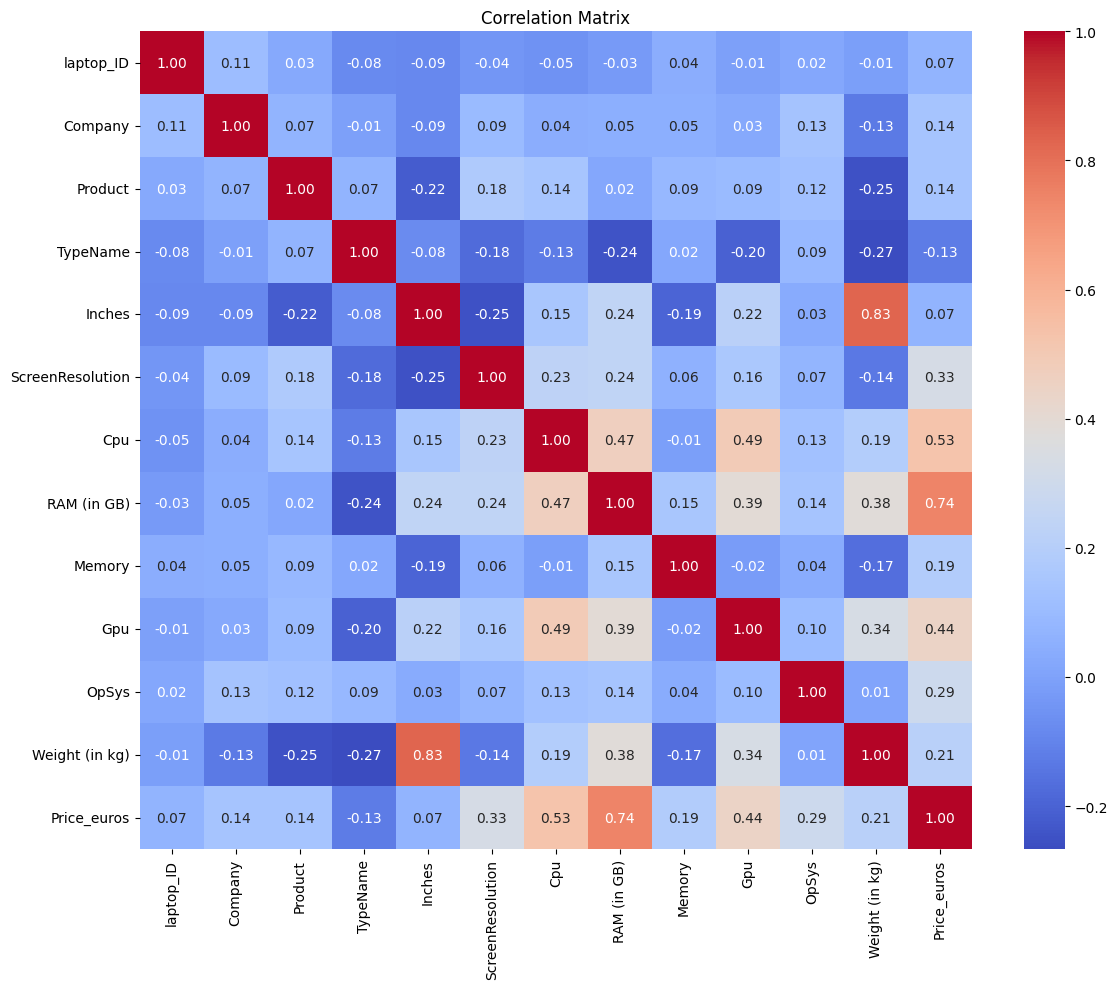

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

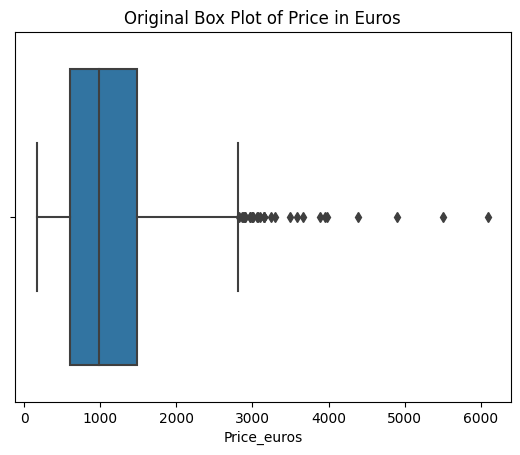

In [14]:
sns.boxplot(x='Price_euros', data=df)
plt.title(f'Original Box Plot of Price in Euros')
plt.show()

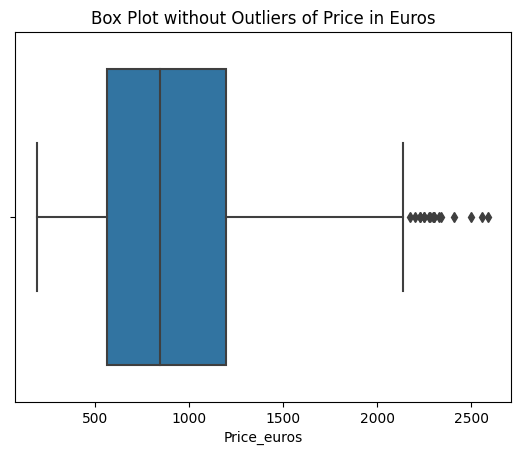

In [58]:
df1=df[df['Price_euros']<2620]
sns.boxplot(x='Price_euros', data=df1)
plt.title(f'Box Plot without Outliers of Price in Euros')
plt.show()
df=df[df['Price_euros']<2620]

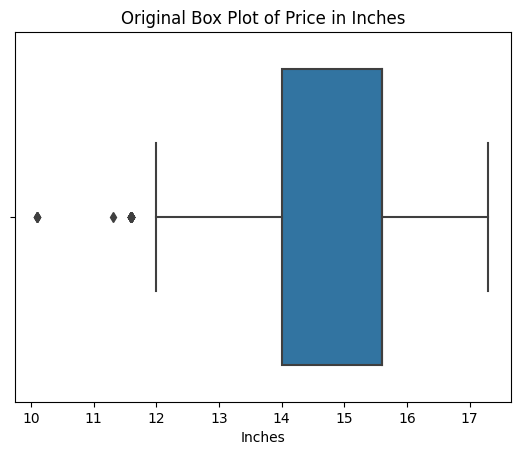

In [18]:
sns.boxplot(x='Inches', data=df)
plt.title(f'Original Box Plot of Price in Inches')
plt.show()

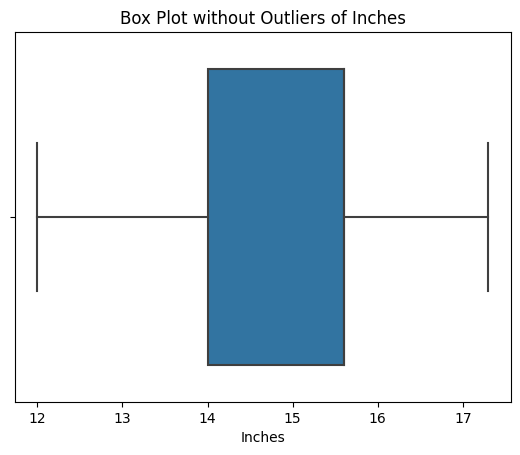

In [57]:
df2=df[df['Inches']>11.7]
sns.boxplot(x='Inches', data=df2)
plt.title(f'Box Plot without Outliers of Inches')
plt.show()
df=df[df['Inches']>11.7]

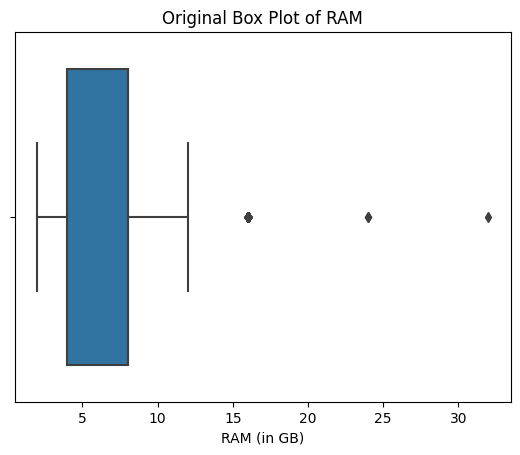

In [21]:
sns.boxplot(x='RAM (in GB)', data=df)
plt.title(f'Original Box Plot of RAM')
plt.show()

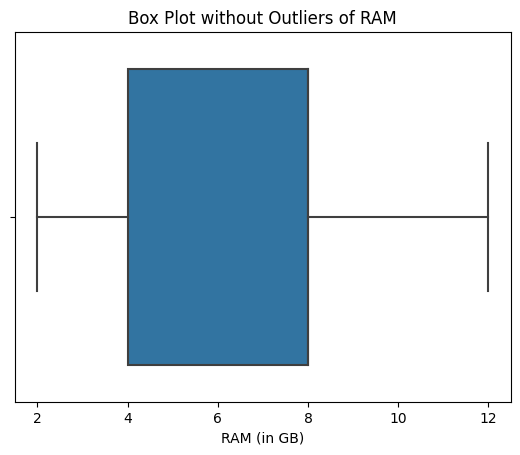

In [56]:
df3=df[df['RAM (in GB)']<16]
sns.boxplot(x='RAM (in GB)', data=df3)
plt.title(f'Box Plot without Outliers of RAM')
plt.show()
df=df[df['RAM (in GB)']<16]

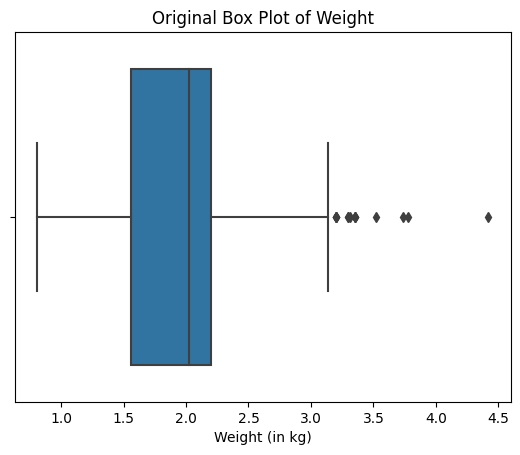

In [38]:
sns.boxplot(x='Weight (in kg)', data=df)
plt.title(f'Original Box Plot of Weight')
plt.show()

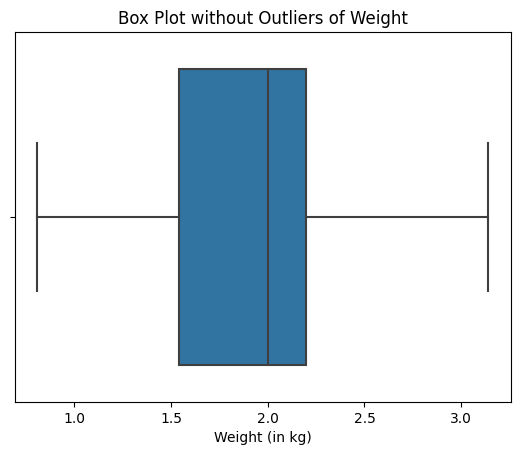

In [55]:
df4=df[df['Weight (in kg)']<3.2]
sns.boxplot(x='Weight (in kg)', data=df4)
plt.title(f'Box Plot without Outliers of Weight')
plt.show()
df=df[df['Weight (in kg)']<3.2]

In [60]:
df.shape

(1025, 13)

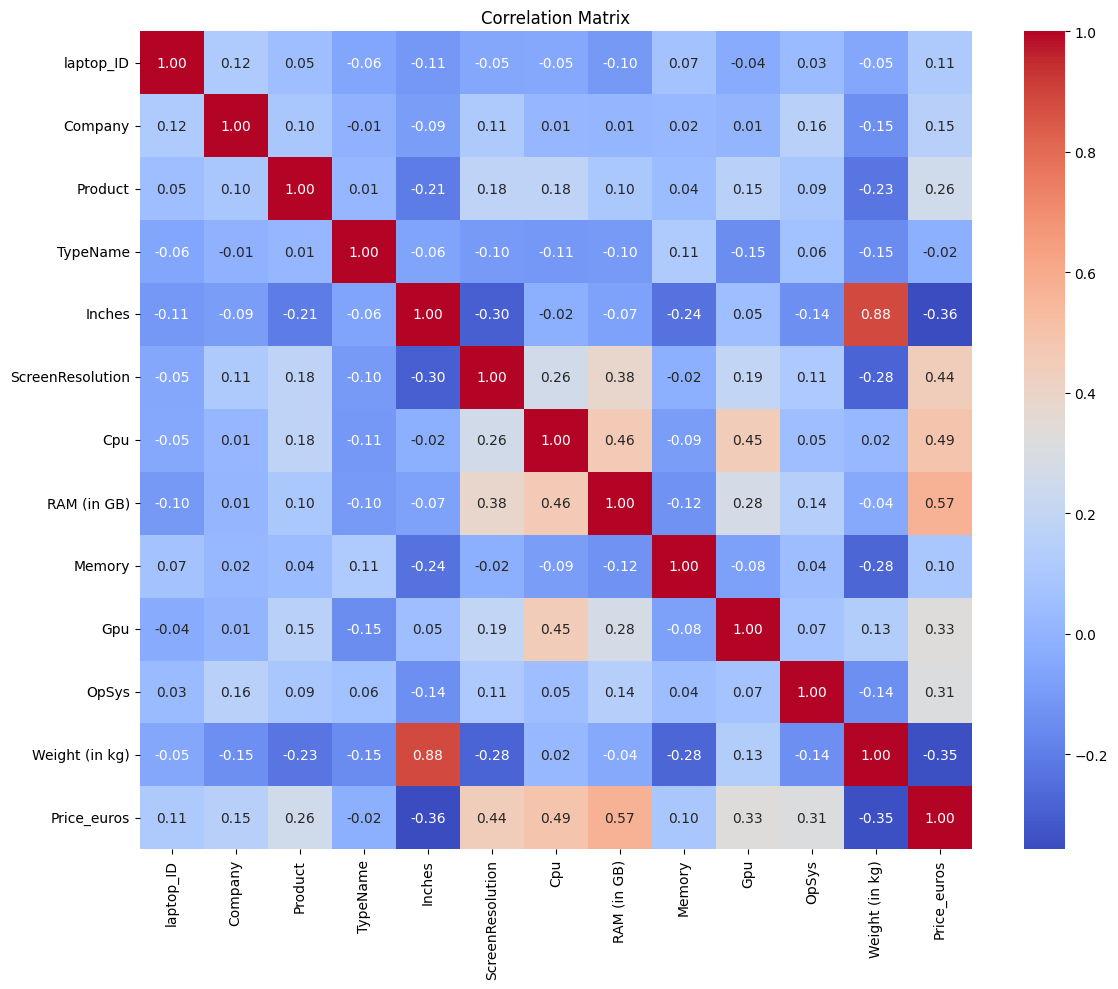

In [61]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [62]:
#Linear regression

In [80]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
desired_width = 400
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 20)

X = df[['RAM (in GB)','Cpu','ScreenResolution','Gpu','OpSys']]
y = df.Price_euros
lg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y)
lg.fit(X_train, y_train)
print('Accuracy = ',lg.score(X_test, y_test))
y_prime = lg.predict(X_test)
#print(y_prime, np.array(y_test))
print('MAE = ', mean_absolute_error(y_test, y_prime))
print('MSE =', mean_squared_error(y_test, y_prime))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_prime)))

Accuracy =  0.523885648426442
MAE =  260.5978715559792
MSE = 114926.88544048459
RMSE =  339.0086804795485


In [81]:
#Logistic Regression

In [99]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
desired_width = 400
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 20)
X = df[['RAM (in GB)','Cpu','ScreenResolution','Gpu','OpSys']]
y = df.Price_euros
df['Price_in_euros_class'] = df.Price_euros.apply(lambda x: 'low' if x < 1197 else 'high')
y2 = df.Price_in_euros_class
log = LogisticRegression()
X_train, X_test, y2_train, y2_test = train_test_split(X,y2)
print(X_train.shape, y2_train.shape, X_test.shape, y2_test.shape)
print(log.fit(X_train, y2_train))
print('Accuracy = ',log.score(X_test, y2_test))
y2_pred = log.predict(X_test)
#print(y2_pred, np.array(y2_test))
print(confusion_matrix(y2_test, y2_pred))

(768, 5) (768,) (257, 5) (257,)
LogisticRegression()
Accuracy =  0.7821011673151751
[[ 32  38]
 [ 18 169]]


In [100]:
#SVR, SVC regression and classification

In [101]:
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
desired_width = 400
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 20)

X = df[['RAM (in GB)','Cpu','ScreenResolution','Gpu','OpSys']]
X1 = X
y = df.Price_euros
df['Price_in_euros_class'] = df.Price_euros.apply(lambda x: 'low' if x < 1197 else 'high')
X_train, X_test, y_train, y_test = train_test_split(X,y)
X1_train, X1_test, y2_train, y2_test = train_test_split(X1,y2)
svr_reg = SVR()
svc_class = SVC()
svr_reg.fit(X_train, y_train)
print('svr_score = ', svr_reg.score(X_test, y_test))
svc_class.fit(X1_train, y2_train)
print('svc_score = ', svc_class.score(X1_test, y2_test))
y2_pred = svc_class.predict(X_test)
print(confusion_matrix(y2_test, y2_pred))

svr_score =  0.041423557007685186
svc_score =  0.77431906614786
[[  1  58]
 [  1 197]]


In [ ]:
#Knearest Neighbors Regression and Classification

In [102]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
desired_width = 400
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 20)

X = df[['RAM (in GB)','Cpu','ScreenResolution','Gpu','OpSys']]
X1 = X
y = df.Price_euros
df['Price_in_euros_class'] = df.Price_euros.apply(lambda x: 'low' if x < 1197 else 'high')
y2 = df.Price_in_euros_class
X_train, X_test, y_train, y_test = train_test_split(X,y)
X1_train, X1_test, y2_train, y2_test = train_test_split(X1,y2)
knn_reg = KNeighborsRegressor()
knn_class = KNeighborsClassifier()
knn_reg.fit(X_train, y_train)
print('knn_reg score = ', knn_reg.score(X_test, y_test))
knn_class.fit(X1_train, y2_train)
print('knn_class score = ', knn_class.score(X1_test, y2_test))
y2_pred = knn_class.predict(X_test)
print(confusion_matrix(y2_test, y2_pred))

knn_reg score =  0.6186837285198996
knn_class score =  0.8210116731517509
[[ 18  38]
 [ 51 150]]


In [103]:
#Kmeans clustering

In [104]:
#Silhouette score

In [110]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
desired_width = 320

X = df[['RAM (in GB)','Cpu','ScreenResolution','Gpu','OpSys']]
for i in range (2,10):
    k_groups=KMeans(n_clusters=i).fit(X)
    labels=k_groups.labels_
    print('K Groups = ', i, 'Silhouette Coefficient = ', silhouette_score(X, labels))

C:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

K Groups =  2 Silhouette Coefficient =  0.4002620016729076
K Groups =  3 Silhouette Coefficient =  0.35516162559930065
K Groups =  4 Silhouette Coefficient =  0.38743864433538044
K Groups =  5 Silhouette Coefficient =  0.3936024880886817
K Groups =  6 Silhouette Coefficient =  0.39386765279744196
K Groups =  7 Silhouette Coefficient =  0.40238304841839356
K Groups =  8 Silhouette Coefficient =  0.38174687971658017
K Groups =  9 Silhouette Coefficient =  0.401202149297621


C:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [116]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
desired_width = 320
Y=df.drop('Price_euros', axis=1)
Y1=Y[['RAM (in GB)','Cpu','ScreenResolution','Gpu','OpSys']]
k_groups=KMeans(n_clusters=3, random_state=0).fit(Y1)
#print(k_groups.labels_)
print(len(k_groups.labels_), Y1.shape)
Y1['cluster']=k_groups.labels_ + 1
#print(Y1.head(3))
print(Y1.groupby('cluster').mean())

1025 (1025, 5)
         RAM (in GB)        Cpu  ScreenResolution        Gpu     OpSys
cluster                                                               
1           7.550914  93.268930         10.443864  68.357702  4.822454
2           6.367906  71.432485          8.150685  44.328767  4.866928
3           4.519084  25.213740          3.603053  29.595420  4.519084


C:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ishan\AppData\Local\Temp\ipykernel_4100\2219340323.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y1['cluster']=k_groups.labels_ + 1


In [117]:
cluster_counts = Y1['cluster'].value_counts()

print("Number of records in each cluster:")
print(cluster_counts)

Number of records in each cluster:
cluster
2    511
1    383
3    131
Name: count, dtype: int64


In [118]:
#Dimensionality reduction - Principal Component Analysis

In [131]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
desired_width = 400
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 20)
X = df[['RAM (in GB)','Cpu','ScreenResolution','Gpu','OpSys']]
X1 = X
pca = PCA(4)
X_transformed = pca.fit_transform(X)
y = df.Price_euros
y1 = df.Price_euros
lg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)
print(X_transformed.shape)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
lg.fit(X_train, y_train)
print('PCA = ', lg.score(X_test, y_test))
lg.fit(X1_train,y1_train)
print('non-PCA = ', lg.score(X1_test, y1_test))

(1025, 4)
(768, 4) (768,) (257, 4) (257,)
PCA =  0.49803863319736574
non-PCA =  0.47537014121895094


In [143]:
file_path = r'C:\Users\ishan\Downloads\laptop_price.csv'
dataset = pd.read_csv(file_path, encoding='ISO-8859-1')

dataset['Ram'] = dataset['Ram'].astype(str)
dataset['Ram'] = dataset['Ram'].str.replace('GB', '').astype(int)

dataset['Weight'] = dataset['Weight'].astype(str)
dataset['Weight'] = dataset['Weight'].str.replace('kg', '').astype(float)

dataset=dataset.rename(columns={'Ram': 'RAM (in GB)', 'Weight': 'Weight (in kg)'})

In [ ]:
#Data Visualization

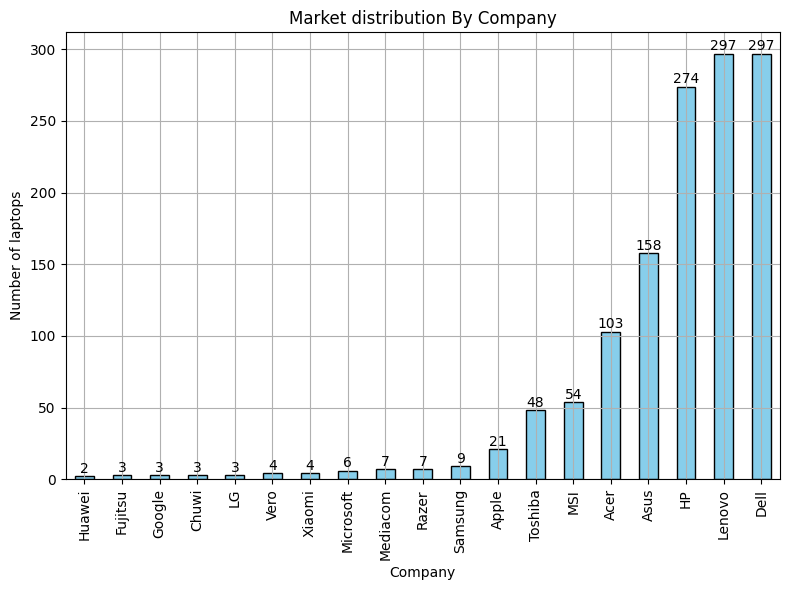

In [144]:
plt.figure(figsize=(8,6))
Total_count=dataset['Company'].value_counts().sort_values(ascending=True)
Total_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Market distribution By Company')
plt.xlabel('Company')
plt.ylabel('Number of laptops')
plt.grid(True)
plt.xticks(rotation=450)

for i, counts in enumerate(Total_count):
    plt.text(i, counts + 0.2, str(counts), ha='center', va='bottom')
plt.tight_layout()
plt.show()

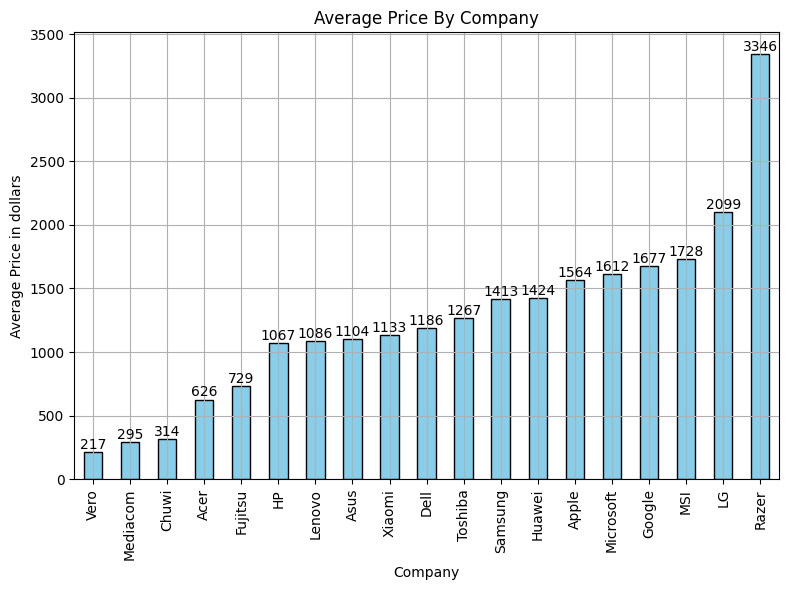

In [152]:
plt.figure(figsize=(8,6))
Average_price=dataset.groupby('Company')['Price_euros'].mean().sort_values(ascending=True)
Average_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price By Company')
plt.xlabel('Company')
plt.ylabel('Average Price in dollars')
plt.grid(True)
plt.xticks(rotation=450)

for i, price in enumerate(Average_price):
    plt.text(i, price + 0.2, f'{int(price)}', ha='center', va='bottom')
plt.tight_layout()    
plt.show()

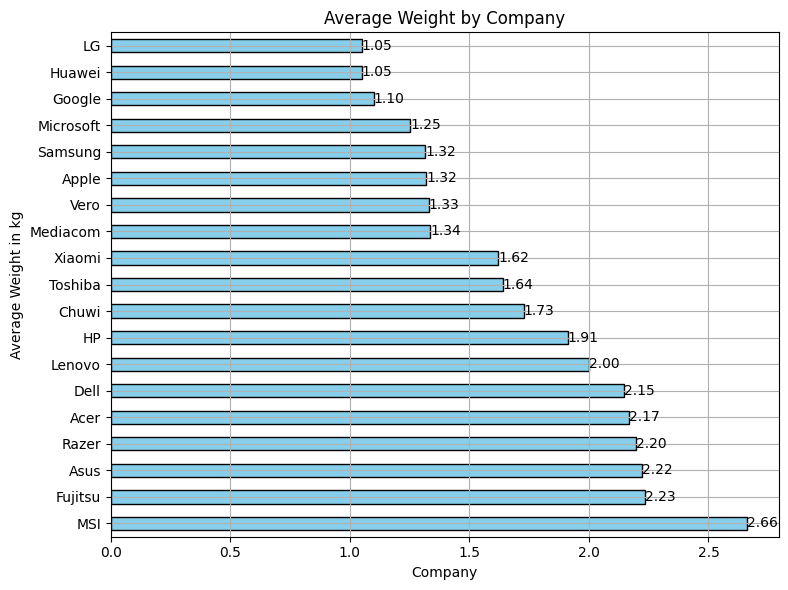

In [160]:
plt.figure(figsize=(8,6))
Average_weight=dataset.groupby('Company')['Weight (in kg)'].mean().sort_values(ascending=False)
Average_weight.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Average Weight by Company')
plt.xlabel('Company')
plt.ylabel('Average Weight in kg')
plt.grid(True)
plt.xticks(rotation=0)

for i, weight in enumerate(Average_weight):
    plt.text(weight, i, f'{weight:.2f}', va='center', ha='left', color='black')
plt.tight_layout()
plt.show()

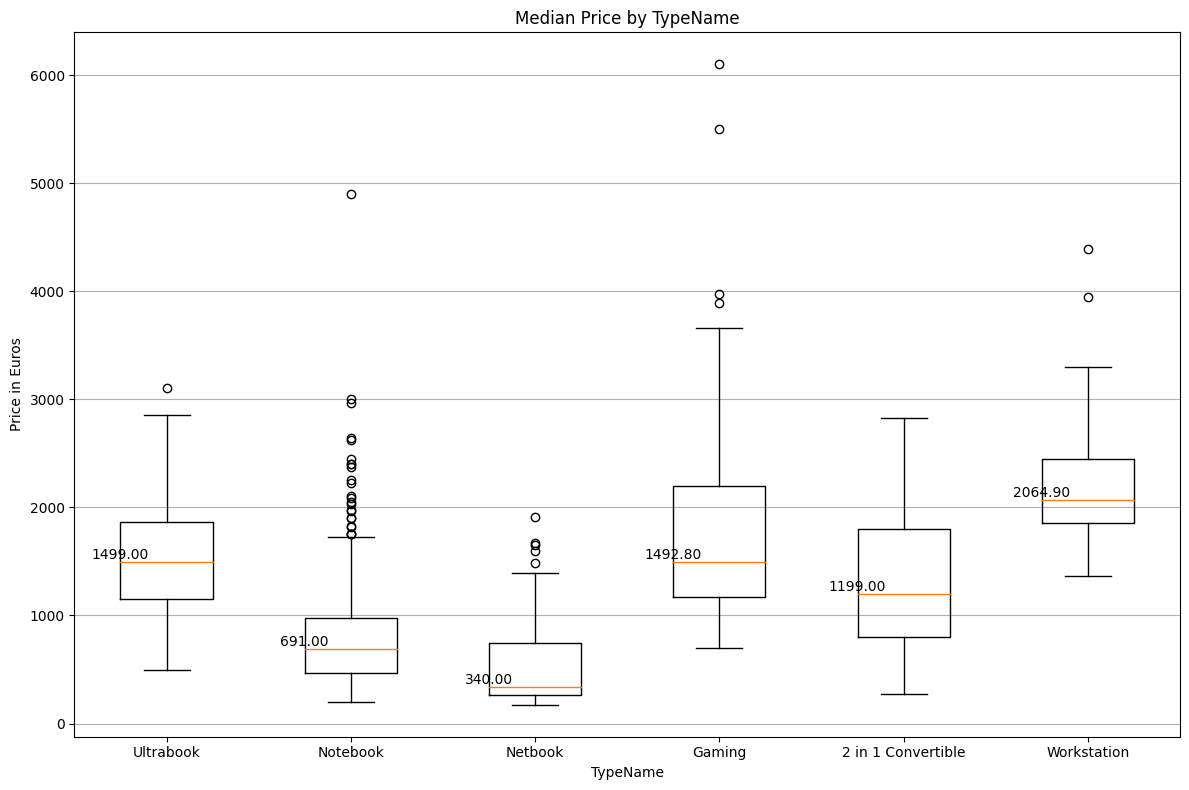

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

data_to_plot = [dataset[dataset['TypeName'] == typename]['Price_euros'] for typename in dataset['TypeName'].unique()]

plt.figure(figsize=(12, 8))
boxplot = plt.boxplot(data_to_plot, labels=dataset['TypeName'].unique(), vert=True, patch_artist=False)

plt.title('Median Price by TypeName')
plt.xlabel('TypeName')
plt.ylabel('Price in Euros')
plt.grid(True, axis='y')
plt.xticks(rotation=0)

for median in boxplot['medians']:
    x = median.get_xdata()[0]
    y = median.get_ydata()[0]
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


In [177]:
#Resolution

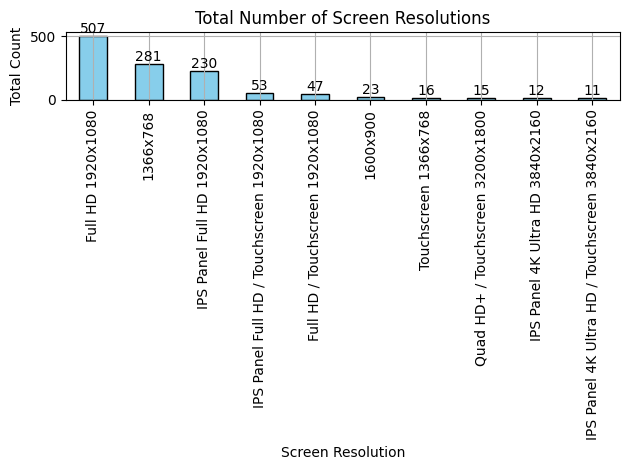

In [186]:
screen_resolutions = dataset['ScreenResolution'].value_counts().head(10).sort_values(ascending=False)
screen_resolutions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Number of Screen Resolutions')
plt.xlabel('Screen Resolution')
plt.ylabel('Total Count')
plt.grid(True)
plt.xticks(rotation=90)

for i, count in enumerate(screen_resolutions):
    plt.text(i, count + 0.2, f'{int(count)}', ha='center', va='bottom')
plt.tight_layout()    
plt.show()


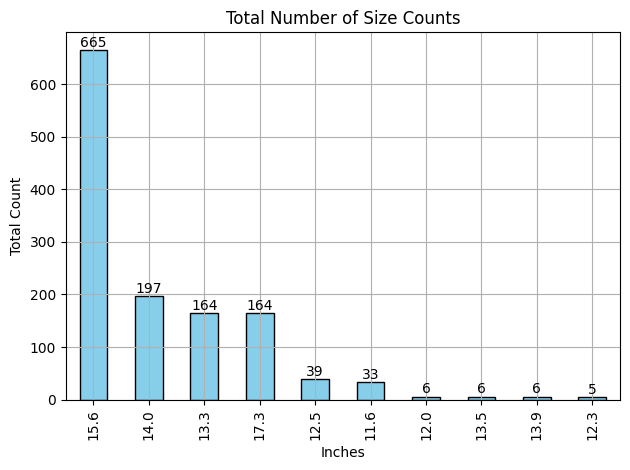

In [187]:
Inches = dataset['Inches'].value_counts().head(10).sort_values(ascending=False)
Inches.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Number of Size Counts')
plt.xlabel('Inches')
plt.ylabel('Total Count')
plt.grid(True)
plt.xticks(rotation=90)

for i, count in enumerate(Inches):
    plt.text(i, count + 0.2, f'{int(count)}', ha='center', va='bottom')
plt.tight_layout()    
plt.show()

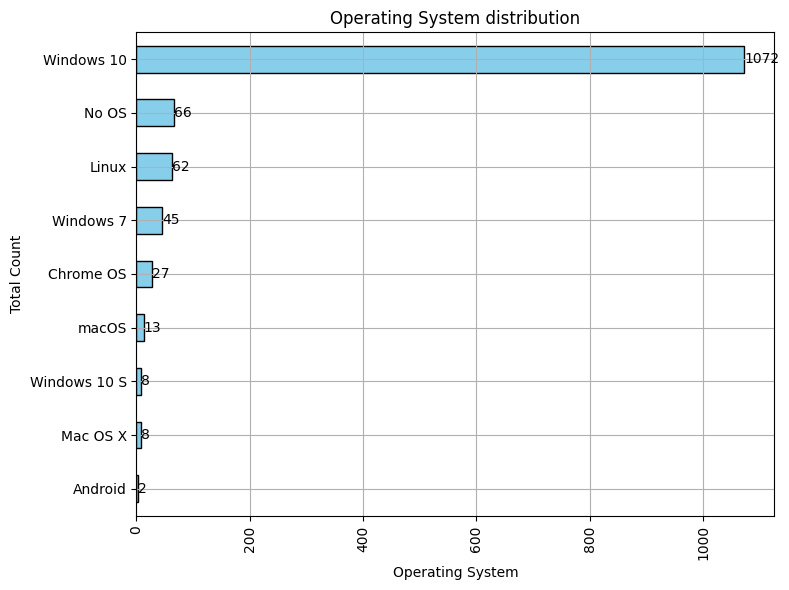

In [191]:
plt.figure(figsize=(8,6))
Total_count=dataset['OpSys'].value_counts().sort_values(ascending=True)
Total_count.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Operating System distribution')
plt.xlabel('Operating System')
plt.ylabel('Total Count')
plt.grid(True)
plt.xticks(rotation=450)

for i, counts in enumerate(Total_count):
    plt.text(counts, i, str(counts), va='center', ha='left')
plt.tight_layout()
plt.show()

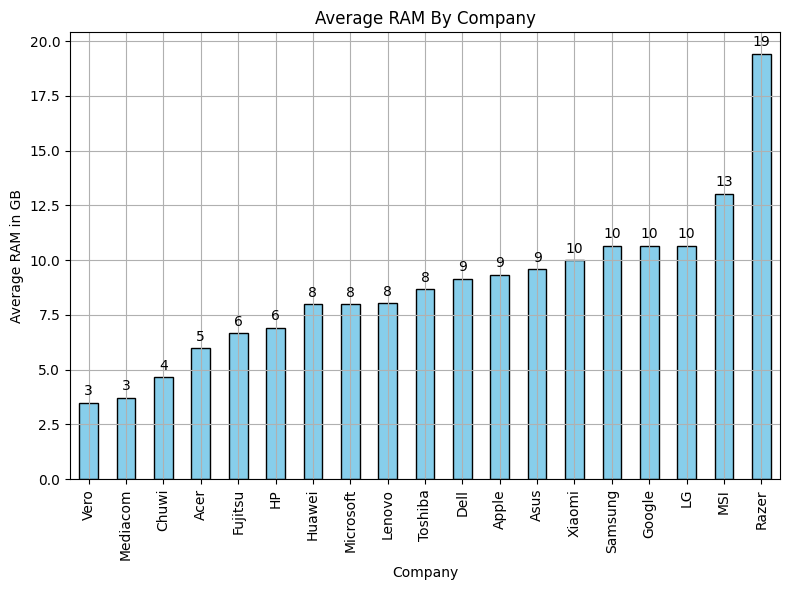

In [197]:
plt.figure(figsize=(8,6))
Average_RAM=dataset.groupby('Company')['RAM (in GB)'].mean().sort_values(ascending=True)
Average_RAM.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average RAM By Company')
plt.xlabel('Company')
plt.ylabel('Average RAM in GB')
plt.grid(True)
plt.xticks(rotation=450)

for i, RAM in enumerate(Average_RAM):
    plt.text(i, RAM + 0.2, f'{int(RAM)}', ha='center', va='bottom')
plt.tight_layout()    
plt.show()

In [198]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   RAM (in GB)       1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight (in kg)    1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 127.4+ KB
